In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
# Read in dataframes from csv file that will be used for the analysis 
df_cal = pd.read_csv('data/calendar.csv')
df_reviews = pd.read_csv('data/reviews.csv')
df_li = pd.read_csv('data/listings.csv')

df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df_cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [4]:
df_reviews[df_reviews['listing_id'] == 7202016]

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [5]:
df_li.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [6]:
# Business questions:
# 1. How seasonality (Spring, Summer, Fall, and Winter) impact availability.
# 2. What's the correlation between listing details and room price. 
# 3. Can we predict and recommend room's price using the features analyzed in Question 2?

## Does traveling season (Apr., Jul., and Dec.) impact listings' availability?

In [7]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [8]:
# There in total 1393570 listing information collected
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [9]:
# Transform date in df_cal from object to date 
date_func = lambda x: datetime.strptime(x, '%Y-%m-%d')
df_cal['datetime'] = df_cal['date'].apply(date_func)
df_cal.drop(columns=['date'], inplace=True)
df_cal = df_cal.rename(columns={'datetime': 'date'})

In [10]:
# Create dataframe for season analysis 
df_se = df_cal[['listing_id', 'available', 'date']]
df_se.head()

,listing_id,available,date
0,241032,t,2016-01-04
1,241032,t,2016-01-05
2,241032,f,2016-01-06
3,241032,f,2016-01-07
4,241032,f,2016-01-08


<AxesSubplot:xlabel='date'>

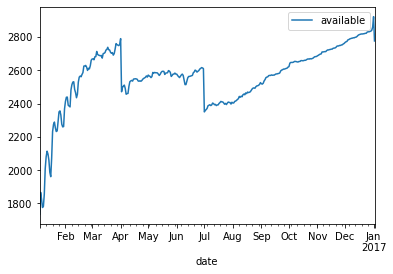

In [11]:
# From this line chart, we can see that there seems to be a relationship between availability and date.
# From Jan. to Apr., the availability of properties grow contineously. However, we see that in about Spring Break time
# and summer time, the availibility dropped significantly. After summer time, the availibility continue to increase.
# The issue we are facing is: 1. Does the number of listing grow triggered the increase in availibility?
# 2. If we put this chart in month, what the data looks like?
df_sef = df_se[df_se['available'] == 't']
df_sef[['available', 'date']].groupby('date').count().plot()

In [12]:
# Does number of listing grow over time?
# Remove the tail of the data in 2017 in order to better understand seasonal impact
df_se = df_se[df_se['date'] <= '2016-12-31']

# Transform date to week and month 
df_se['week'] = df_se['date'].dt.isocalendar().week
df_se['month'] = df_se['date'].dt.month

df_se.head()

,listing_id,available,date,week,month
0,241032,t,2016-01-04,1,1
1,241032,t,2016-01-05,1,1
2,241032,f,2016-01-06,1,1
3,241032,f,2016-01-07,1,1
4,241032,f,2016-01-08,1,1


In [30]:
df_se['listing_id'].nunique()

3818

<AxesSubplot:xlabel='week'>

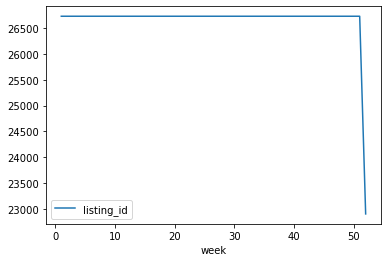

In [13]:
# From this, we can see that the listing is not growing by week.
df_se[['listing_id', 'week']].groupby('week').count().plot()

Text(0.5, 1.0, 'Listing Availablility by Month')

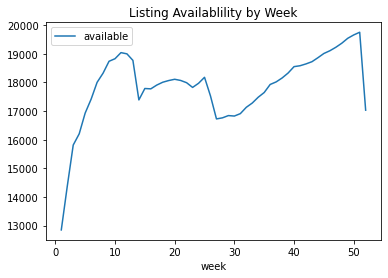

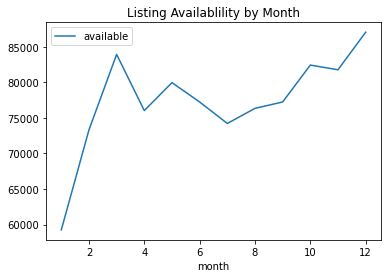

In [14]:
# Plot in month and week 

df_se[df_se['available'] == 't'][['week', 'available']].groupby('week').count().plot()
plt.title('Listing Availablility by Week')

df_se[df_se['available'] == 't'][['month', 'available']].groupby('month').count().plot()
plt.title('Listing Availablility by Month')

## Is there any correlation between price and property's listing details (beds, etc)?

In [15]:
# Select columns are most direct listing details
li_cols = ['id', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 
           'accommodates', 'bathrooms','beds', 'bed_type', 'cancellation_policy', 
           'host_is_superhost', 'review_scores_rating']

df_lid = df_li[li_cols]
df_lid.head(1)

,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,beds,bed_type,cancellation_policy,host_is_superhost,review_scores_rating
0,241032,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,Real Bed,moderate,f,95.0


In [16]:
# Select columns in the calendar field to get average price for listing
df_cal_f = df_cal[df_cal['available'] == 't']
df_cal_f = df_cal_f[['listing_id', 'price']]

# Set the Price column to float 
df_cal_f['price_adj'] = df_cal_f['price'].str.replace(r'\,', '').str.replace(r'\$', '')
df_cal_f['price'] = df_cal_f['price_adj'].astype({'price_adj':'float'})
df_cal_f.drop(columns=['price_adj'], inplace=True)

df_cal_fg = df_cal_f.groupby('listing_id').mean().round(2)
df_cal_fg.reset_index(inplace=True)

In [17]:
# Join listing with price 
df_j = df_cal_fg.merge(df_lid, left_on='listing_id', right_on='id', how='left')
df_j.shape[0]

3723

In [18]:
df_j.head()

,listing_id,price,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,beds,bed_type,cancellation_policy,host_is_superhost,review_scores_rating
0,3335,120.00,3335,Rainier Valley,NaN,Entire home/apt,4,1.0,2.0,Real Bed,strict,f,NaN
1,4291,82.00,4291,Other neighborhoods,House,Private room,2,1.0,1.0,Real Bed,moderate,f,92.0
2,5682,53.94,5682,Delridge,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,strict,f,96.0
3,6606,92.85,6606,Other neighborhoods,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,strict,f,93.0
4,7369,85.00,7369,Capitol Hill,Condominium,Entire home/apt,2,1.0,1.0,Real Bed,flexible,f,94.0


count    3723.000000
mean      135.764037
std        97.385691
min        20.000000
25%        75.630000
50%       108.420000
75%       162.100000
max      1301.820000
Name: price, dtype: float64

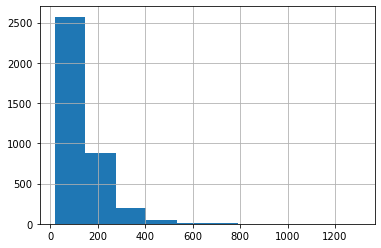

In [19]:
# understand price distribution
df_j['price'].hist()
df_j['price'].describe()

In [20]:
# Drop 17 rows that has NaN data 
df_j = df_j.dropna()
df_j.shape[0]

3089

In [21]:
df_j.dtypes

listing_id                        int64
price                           float64
id                                int64
neighbourhood_group_cleansed     object
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
beds                            float64
bed_type                         object
cancellation_policy              object
host_is_superhost                object
review_scores_rating            float64
dtype: object

In [22]:
# Instantiate numeric encoder preprocessing method
labelencoder = LabelEncoder()

# Create function to transform categorical data to dummies and keep continues data 
def corr(df):
    '''
    Input 
    df - pandas dataframe 
    
    Output
    Return
    
    '''
    # drop ID column not used for correlation
    df = df.drop(columns=['listing_id', 'id'])

    # num_vars contains all continues revenue 
    num_vars = df.select_dtypes(include=['float', 'int'])
    cat_vars = df.select_dtypes(include=['object'])
    
    # encode categorical variables to numerical code for correlation analysis
    cat_vars = cat_vars.apply(labelencoder.fit_transform)

    df_c = pd.DataFrame(pd.concat([num_vars, cat_vars], axis=1)) 
    
    # generate heatmap to show correlation
    size = (8, 7)
    fig, ax = plt.subplots(figsize=size)
    sns.heatmap(df_c.corr(), annot=True).set_title('Correlation heatmap: Price vs Listing Details')

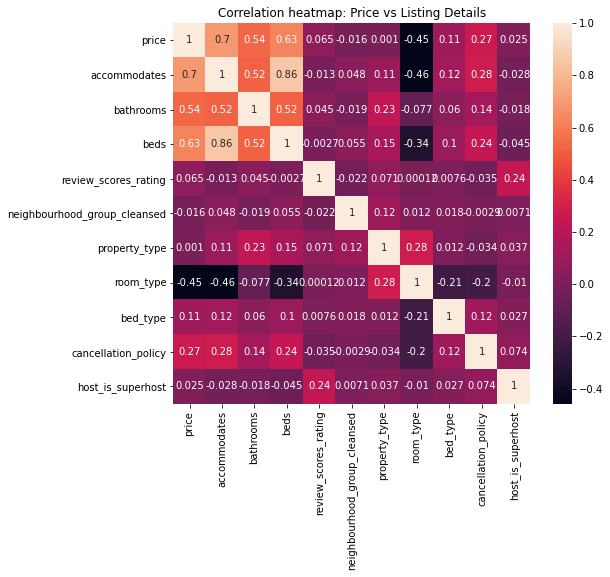

In [23]:
corr(df_j)

Business Question
Is there a correlation between price and the property's listing details (beds, etc)?

Findings
1. Price has high positive correlation with accomodates (0.7), beds (0.63), and bathroom (0.54). 
From this positive correlation, we can identify the key factors influencing price. The more accomodates, beds, and bathroom the host provides, the higher price they can list on Boston Airbnb's market.

2. Price has negative correlation with room type (-0.45). 
Although we can see that there are correlation between price and listing details, we can't see the detailed information of those listing. For instance, if i'd like improve my price on the listing, I don't know which room type I should use for the listing. 

3. Review scores rating (0.065) and neightbourhood (0.016) do not have strong correlation with price, which is suprising. 

## Can we create a prediction model for listing price in Seattle Area using the listing details analyzed in question 2?

In [24]:
df_j.head()

,listing_id,price,id,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,beds,bed_type,cancellation_policy,host_is_superhost,review_scores_rating
1,4291,82.00,4291,Other neighborhoods,House,Private room,2,1.0,1.0,Real Bed,moderate,f,92.0
2,5682,53.94,5682,Delridge,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,strict,f,96.0
3,6606,92.85,6606,Other neighborhoods,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,strict,f,93.0
4,7369,85.00,7369,Capitol Hill,Condominium,Entire home/apt,2,1.0,1.0,Real Bed,flexible,f,94.0
5,9419,85.62,9419,Other neighborhoods,House,Private room,2,3.0,1.0,Real Bed,strict,f,91.0


In [25]:
df_j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3089 entries, 1 to 3698
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   listing_id                    3089 non-null   int64  
 1   price                         3089 non-null   float64
 2   id                            3089 non-null   int64  
 3   neighbourhood_group_cleansed  3089 non-null   object 
 4   property_type                 3089 non-null   object 
 5   room_type                     3089 non-null   object 
 6   accommodates                  3089 non-null   int64  
 7   bathrooms                     3089 non-null   float64
 8   beds                          3089 non-null   float64
 9   bed_type                      3089 non-null   object 
 10  cancellation_policy           3089 non-null   object 
 11  host_is_superhost             3089 non-null   object 
 12  review_scores_rating          3089 non-null   float64
dtypes: 

In [26]:
# Drop ID columns 
df_j.drop(columns=['listing_id', 'id'], axis=1, inplace=True)

In [27]:
# Apply get dummies on the same features to predict price of listings.

def data_clean(df):
    '''
    Input
    df: contains all independent and dependent variables.

    Output
    X: cleaned set of features used as independent variabiles
    y: cleaned feature as dependent variable
    
    '''
    

    # Create dependent variable 
    y = df['price']
    
    # Create indenpendent variable set 
    X = df.drop(columns=['price'])
    
    # Break down X into number contineous and categorical variables
    num_var = X.select_dtypes(include=['float', 'int'])
    cat_var = X.select_dtypes(include=['object'])
    
    cat_var = pd.get_dummies(cat_var, prefix=cat_var.columns, prefix_sep='_', drop_first=True)
    
    # Combine contineous and categorical variabiles into indenpendent variable dataset
    X = pd.concat([num_var, cat_var], axis = 1)
    
    # return X, y
    return X, y

X, y = data_clean(df_j)

In [28]:
# Modeling
def mod(X, y):
    '''
    Input
    X: Dependent Variables 
    y: Independent Variables
    
    Output: 
    Model Accuracy: r-square, mean squared error 
    
    Description:
    Apply linear regression on the Training and Testing data to create a predict model for price.
    '''
    
    # Instatiate model 
    linearmodel = LinearRegression()
    # Split dataset 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)
    # Fit dataset 
    linearmodel.fit(X_train, y_train)
    
    # Create prediction 
    y_pred = linearmodel.predict(X_test)
    
    print(r2_score(y_test, y_pred))
    print(mean_squared_error(y_test, y_pred))
    

In [29]:
mod(X, y)

0.6114366004085157
3326.9714861379275
